In [2]:
#Глубокое обучение - итоговый проект

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("data_deap/train.csv")

In [5]:
train.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


##Анализ данных

In [6]:
train.isna().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [7]:
#пропусков нет

In [8]:
#проверим на дубликаты
train.duplicated().any()

False

In [9]:
#дубликатов нет

In [10]:
#Удалим столбец ID
train = train.drop('ID', axis=1)

In [11]:
train['chest'].describe()

count    600000.000000
mean          3.170247
std           0.949618
min          -0.538498
25%           3.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: chest, dtype: float64

In [12]:
#Боль в груди не может оцениваться как -0.54(только от 1 до 4)
mask = train['chest'] < 0
train[mask]


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
2262,59.528701,1,-0.161643,128.261786,282.160094,0,2,182.239821,0,1.913767,2,1,7,1
13692,47.515796,1,-0.020640,131.978043,216.468413,0,0,185.787104,0,1.687848,2,0,3,0
14857,67.987188,0,-0.151059,153.100716,347.054802,0,0,136.612493,0,0.000000,1,0,3,0
22471,73.027249,1,-0.048605,121.463165,235.629937,0,0,153.061302,0,0.000000,1,3,3,0
34415,49.992599,1,-0.023782,116.321476,284.874457,0,0,171.783322,0,0.197817,1,0,3,0
44853,42.067120,1,-0.116718,123.359376,285.091577,0,0,153.897855,1,3.003793,2,0,3,1
64670,47.922797,1,-0.036255,113.797198,236.827594,0,0,153.772966,0,0.379307,2,1,3,0
77649,49.820784,1,-0.267614,128.699809,378.377987,0,0,149.181156,0,0.000000,1,0,3,0
79346,41.372458,0,-0.070879,120.135180,242.028867,0,2,149.358954,0,1.013484,2,1,3,0
148584,49.715090,1,-0.015805,109.590979,224.433366,0,2,123.994224,1,1.534387,2,2,7,1


In [13]:
#Видим что есть много случаев когда признак "chest" отрицательный, будем считать что в этом случае боль отсутствует(т.е признак равен 0)
#Зададим функцию которая исправит все значения в столбце chest
train['chest'] = train['chest'].apply(lambda x: 0 if x < 0 else x)

In [14]:
train.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [15]:
#окрглим признак "chest" до 2 знаков после ,
train['chest'] = train['chest'].round(2)
#округлим признак "resting_blood_pressure"
train['resting_blood_pressure'] = train['resting_blood_pressure'].round()
#округлим признак "serum_cholestoral" 
train['serum_cholestoral'] = train['serum_cholestoral'].round(1)
#округлим признак "maximum_heart_rate_achieved"
train['maximum_heart_rate_achieved'] = train['maximum_heart_rate_achieved'].round()
#округлим признак "oldpeak"
train['oldpeak'] = train['oldpeak'].round(2)
train['age'] = train['age'].round()


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  float64
 1   sex                                   600000 non-null  int64  
 2   chest                                 600000 non-null  float64
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  int64  
 6   resting_electrocardiographic_results  600000 non-null  int64  
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  int64  
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  int64  
 11  

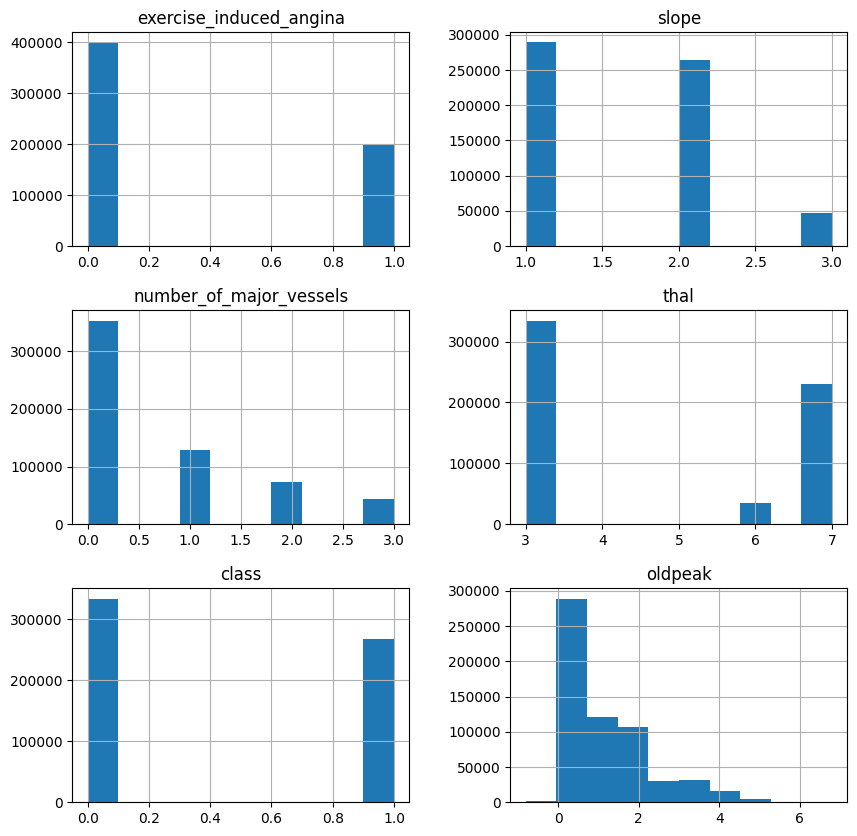

In [17]:
df = train[['exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'class', 'oldpeak']]
df.hist(figsize=(10,10))
plt.show()

In [18]:
#Видим, что признаки slope и thal нужно будет преобразовать в dummy переменные

In [19]:
#Теперь построим боксплоты

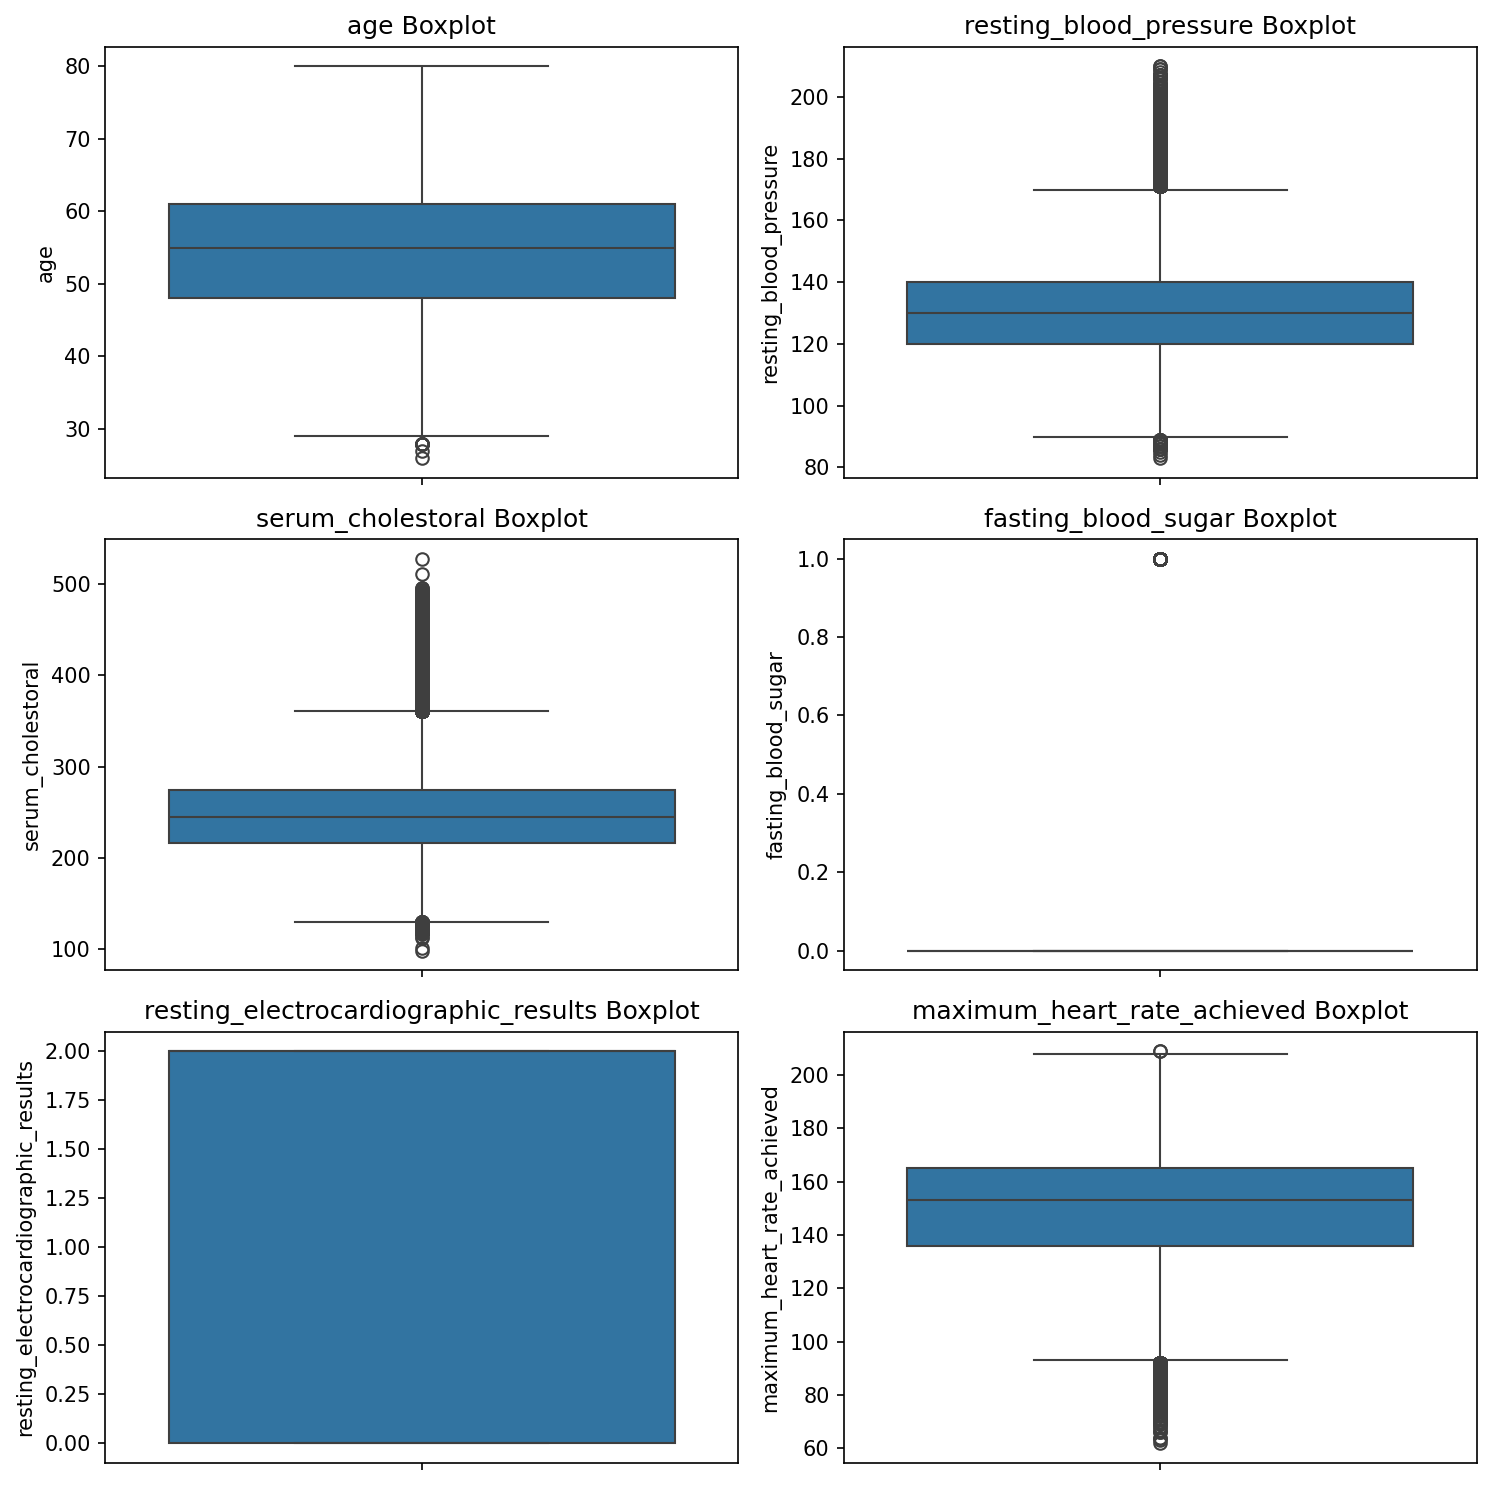

In [20]:
#Задаём цикл для построения боксплотов
columns = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'maximum_heart_rate_achieved']
fig, ax = plt.subplots(3,2, figsize=(10,10), dpi=150)

ax=ax.flatten()

for i in columns:
  sns.boxplot(train[i], ax=ax[columns.index(i)])
  ax[columns.index(i)].set_title(f"{i} Boxplot")

plt.tight_layout()

In [21]:
#Видим большое количество выбрасов по признаку "resting_blood_pressure"(артериальное давление в состоянии покоя)
#В нашем датасете они приемлемы, т.к. гипертония часто является последствием/причиной ССЗ

In [22]:
#По той же причине видим смещение медианы по признаку "Maximum_heart_rate_achieved" 
#В выборке преобладают пациенты с учащённым сердцебиением

In [23]:
#Выбросы по признаку "serum_cholestoral" в сторону высоких значений тоже нужно оставить, т.к. пациенты с повышенным уровнем холестерина интересны для нас
#(у них образуются холестеринновые бляшки)

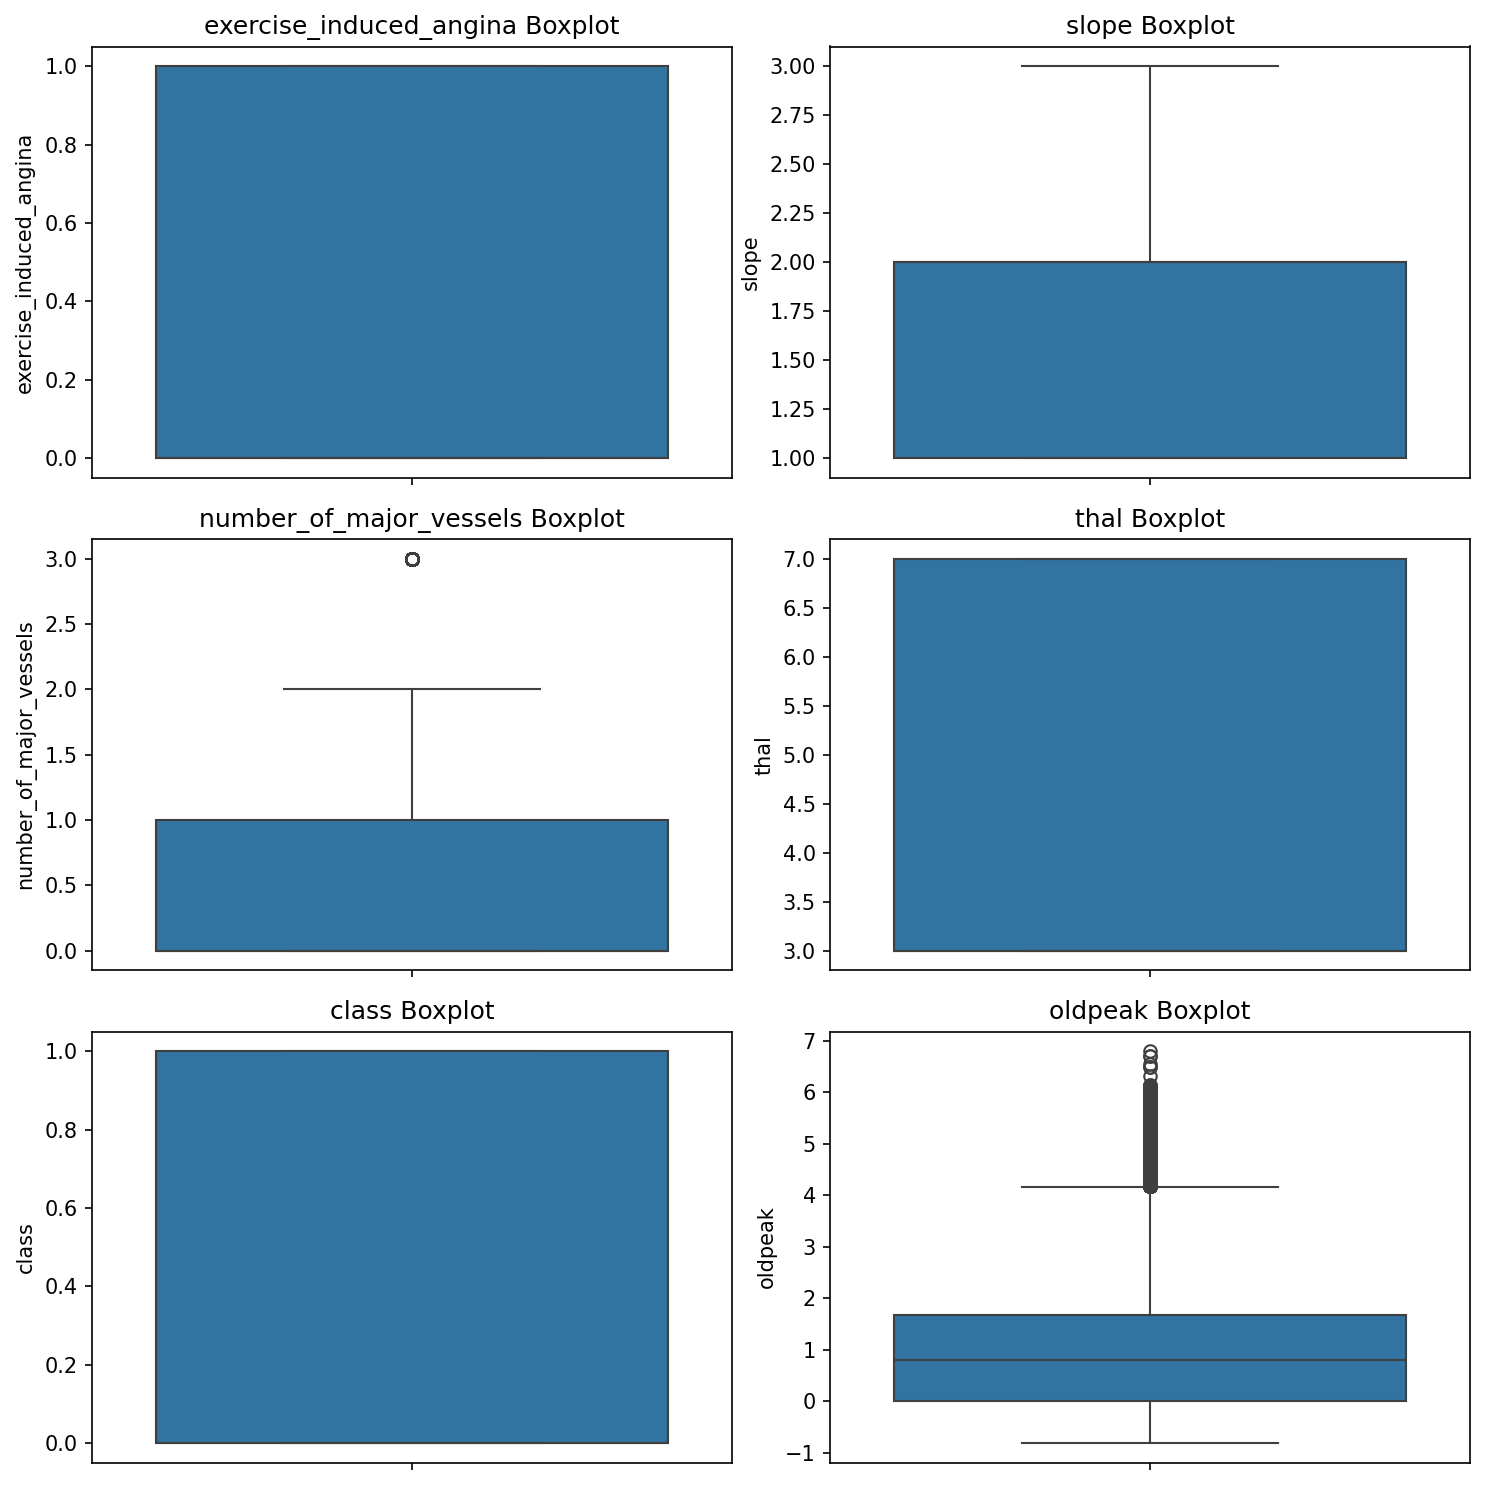

In [24]:
columns = ['exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal', 'class', 'oldpeak']
fig, ax = plt.subplots(3,2, figsize=(10,10), dpi=150)

ax=ax.flatten()

for i in columns:
  sns.boxplot(train[i], ax=ax[columns.index(i)])
  ax[columns.index(i)].set_title(f"{i} Boxplot")

plt.tight_layout()

In [25]:
#В датасете большое количество людей с ССЗ, а именно с депрессией сегмента ST(повышенные значения признака oldpeak)
#Это является наиболее частым проявлением ишемии миокарда(маркером)
#Исследование тких пациентов является важным для нас, оставляем эти выбросы

#Преобразуем некоторые признаки в dummy переменные

In [26]:
train.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.0,0,4.00,163.0,181.1,0,0,148.0,1,0.94,2,0,3,1
1,54.0,1,1.74,130.0,276.5,0,2,153.0,0,0.12,2,0,3,0
2,50.0,1,4.00,147.0,223.3,1,2,102.0,1,1.62,2,2,7,1
3,59.0,1,4.00,112.0,187.2,0,0,158.0,1,0.00,1,1,7,1
4,51.0,1,1.95,138.0,238.5,0,0,173.0,0,1.15,1,1,3,0


In [27]:
#1 -признак thal
df = train['thal']

In [28]:
df = pd.get_dummies(df, columns='thal', drop_first=True)

In [29]:
# df  #значения 6 и 7 соответсвуют фиксированному(fix_def) и обратимому дефектам(rev_def)
#Третье возможное значение(0 - норма) исключается 2 новыми признаками

In [30]:
train['fix_def'] = df[6]
train['rev_def'] = df[7]

In [31]:
train = train.drop('thal', axis=1) #удаляем исходный признак

In [32]:
#2 - признак 'slope'

In [33]:
train['slope'].describe()

count    600000.000000
mean          1.596033
std           0.629821
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: slope, dtype: float64

In [34]:
df = train['slope']
df = pd.get_dummies(df, columns='slope', drop_first=True)

In [35]:
df

,2,3
0,True,False
1,True,False
2,True,False
3,False,False
4,False,False
...,...,...
599995,True,False
599996,True,False
599997,False,False
599998,True,False


In [36]:
train['slope=2'] = df[2]
train['slope=3'] = df[3]

In [37]:
train = train.drop('slope', axis=1)

In [38]:
#3 - 'resting_electrocardiographic_results'

In [39]:
train['resting_electrocardiographic_results'].value_counts()

resting_electrocardiographic_results
2    302698
0    290609
1      6693
Name: count, dtype: int64

In [40]:
df = train['resting_electrocardiographic_results'] #делаем тоже самое для resting_electrocardiographic_results
df = pd.get_dummies(df, columns='resting_electrocardiographic_results', drop_first=True)


In [41]:
train['rest_elcardio=1'] = df[1]
train['rest_elcardio=2'] = df[2]

In [42]:
train = train.drop('resting_electrocardiographic_results', axis=1)

In [43]:
#Создадим функцию для первода dummies в формат 1/0, а потом в категории
def dum_to_cat(data, columns):
    for i in columns:
        data[i] = data[i].astype(int)
        data[i] = data[i].astype('category')
    return data

In [44]:
#Перевоодим dummies в формат 1/0 а затем в тип category 
columns = ['fix_def', 'rev_def', 'slope=2', 'slope=3', 'rest_elcardio=1', 'rest_elcardio=2']
new_data = dum_to_cat(train, columns)

Переведём некоторые признаки в категориальные

In [45]:
train['fasting_blood_sugar'].value_counts()

fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64

In [46]:
train['fasting_blood_sugar'] = train['fasting_blood_sugar'].astype('category')

In [47]:
train['exercise_induced_angina'].value_counts()

exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64

In [48]:
train['exercise_induced_angina'] = train['exercise_induced_angina'].astype('category')

In [49]:
train['number_of_major_vessels'].value_counts()

number_of_major_vessels
0    353137
1    129017
2     73773
3     44073
Name: count, dtype: int64

In [50]:
train['number_of_major_vessels'] = train['number_of_major_vessels'].astype('category')

In [51]:
train['sex'] = train['sex'].astype('category')

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   age                          600000 non-null  float64 
 1   sex                          600000 non-null  category
 2   chest                        600000 non-null  float64 
 3   resting_blood_pressure       600000 non-null  float64 
 4   serum_cholestoral            600000 non-null  float64 
 5   fasting_blood_sugar          600000 non-null  category
 6   maximum_heart_rate_achieved  600000 non-null  float64 
 7   exercise_induced_angina      600000 non-null  category
 8   oldpeak                      600000 non-null  float64 
 9   number_of_major_vessels      600000 non-null  category
 10  class                        600000 non-null  int64   
 11  fix_def                      600000 non-null  category
 12  rev_def                      600000 non-null

Кореляционный анализ

In [53]:
#Кореляционные анализ будем проводить без фиктивных переменных, чтобы сфокусироваться на остальных признаках
data = train.drop(columns=['fix_def', 'rev_def', 'slope=2', 'slope=3', 'rest_elcardio=1', 'rest_elcardio=2'])

In [54]:
#Находим ранг нашей матрицы
corr_matrix = data.corr()
rank = np.linalg.matrix_rank(corr_matrix)
print(rank)

11


In [55]:
#rank равен количеству признаков в датасете, это говорит об отсутствии сильной линейной зависимости между признаками

In [56]:
#Найдём определитель нашей матрицы
corr_matrix = data.corr()
det = np.linalg.det(corr_matrix)
print(det)

0.3030168449790078


In [57]:
#Определитель det близок к 0 что говорит о линейной зависимости между признаками

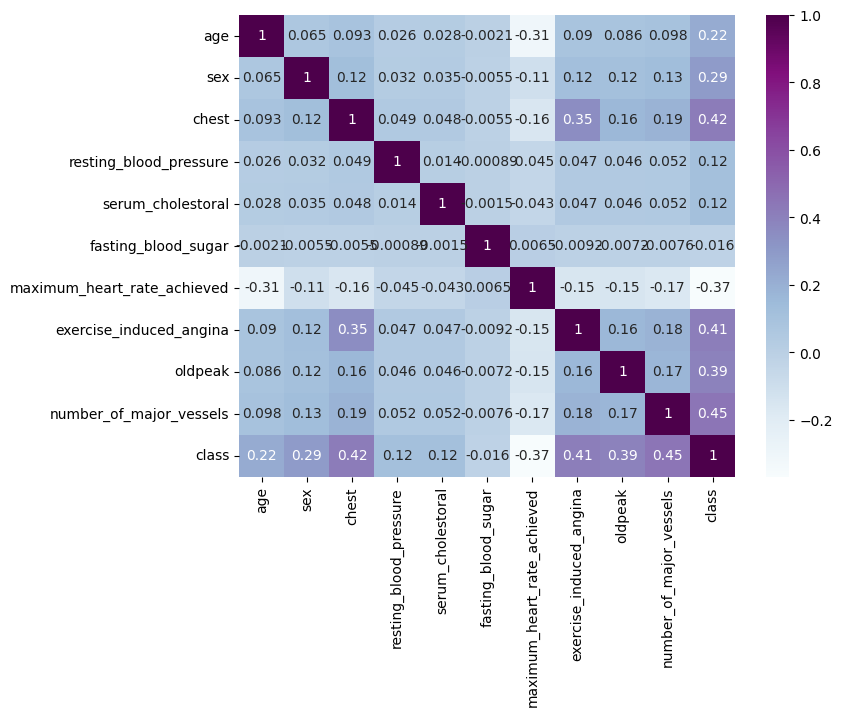

In [58]:
#Построим матрицу кореляций используя heatmap
correlation=data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

In [59]:
#В нашем датасете присутствует небольшая мультиколенеарность
#Стенокардия при нагрузке корелирует с кардиальной болью
#В таком случе оставим признак кардиальная боль('chest') и отбросим признак exercise_induced_angina
train = train.drop('exercise_induced_angina', axis=1)


In [60]:
#Также видим слабую кореляцию признаков fasting_blood_sugar и maximum_heart_rate_achieved с таргетом
#Отбросим их
train = train.drop(columns=['fasting_blood_sugar', 'maximum_heart_rate_achieved'], axis=1)

Предобработка для ТЕСТОВЫХ данных(аналогично)

In [61]:
test = pd.read_csv("data_deap/test.csv")
test['chest'] = test['chest'].apply(lambda x: 0 if x < 0 else x)

#окрглим признак "chest" до 2 знаков после ,
test['chest'] = test['chest'].round(2)
#округлим признак "resting_blood_pressure"
test['resting_blood_pressure'] = test['resting_blood_pressure'].round()
#округлим признак "serum_cholestoral" 
test['serum_cholestoral'] = test['serum_cholestoral'].round(1)
#округлим признак "maximum_heart_rate_achieved"
test['maximum_heart_rate_achieved'] = test['maximum_heart_rate_achieved'].round()
#округлим признак "oldpeak"
test['oldpeak'] = test['oldpeak'].round(2)
test['age'] = test['age'].round()

In [62]:
#создаём dummies
df = test['thal']
df = pd.get_dummies(df, columns='thal', drop_first=True)
test['fix_def'] = df[6]
test['rev_def'] = df[7]
test = test.drop('thal', axis=1)

df = test['slope']
df = pd.get_dummies(df, columns='slope', drop_first=True)
test['slope=2'] = df[2]
test['slope=3'] = df[3]
test = test.drop('slope', axis=1)

df = test['resting_electrocardiographic_results'] #делаем тоже самое для resting_electrocardiographic_results
df = pd.get_dummies(df, columns='resting_electrocardiographic_results', drop_first=True)
test['rest_elcardio=1'] = df[1]
test['rest_elcardio=2'] = df[2]
test = test.drop('resting_electrocardiographic_results', axis=1)



In [63]:
#Перевоодим dummies в формат 1/0 а затем в тип category 
columns = ['fix_def', 'rev_def', 'slope=2', 'slope=3', 'rest_elcardio=1', 'rest_elcardio=2']
new_data = dum_to_cat(test, columns)

In [64]:
#Создаём категории
test['fasting_blood_sugar'] = test['fasting_blood_sugar'].astype('category')
test['exercise_induced_angina'] = test['exercise_induced_angina'].astype('category')
test['number_of_major_vessels'] = test['number_of_major_vessels'].astype('category')
test['sex'] = test['sex'].astype('category')


In [65]:
#Удалим мультиколенеарные признаки и малозначимые признаки
test = test.drop('exercise_induced_angina', axis=1)
test = test.drop(columns=['fasting_blood_sugar', 'maximum_heart_rate_achieved'], axis=1)

Подготовим данные к моделированию

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [67]:
#Определяем таргет для обучения модели 
y = train['class']

In [68]:
X = train.drop('class', axis=1)
X_test = test

In [69]:
#переведём данные в формат массива
#X = np.asarray(X)
#X_test = np.asarray(X)

In [136]:
#Разделим данные на тренировачные и на данные для валидации, т.к. они должны подвергаться предобработке и моделированию независимо от тренировочных
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=TRAIN_SIZE)

Создаём препроцессор для стандартизации

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   age                      600000 non-null  float64 
 1   sex                      600000 non-null  category
 2   chest                    600000 non-null  float64 
 3   resting_blood_pressure   600000 non-null  float64 
 4   serum_cholestoral        600000 non-null  float64 
 5   oldpeak                  600000 non-null  float64 
 6   number_of_major_vessels  600000 non-null  category
 7   class                    600000 non-null  int64   
 8   fix_def                  600000 non-null  category
 9   rev_def                  600000 non-null  category
 10  slope=2                  600000 non-null  category
 11  slope=3                  600000 non-null  category
 12  rest_elcardio=1          600000 non-null  category
 13  rest_elcardio=2          600000 non-null  ca

In [72]:
cat_cols = ['sex', 'number_of_major_vessels', 'fix_def', 'rev_def', 'slope=2', 'slope=3', 'rest_elcardio=1', 'rest_elcardio=2']
num_cols = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'oldpeak']
all_features=cat_cols+num_cols

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   LabelEncoder)

Создаём пайплайн

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ("scaler", StandardScaler(), num_cols),
    ("ohe", OneHotEncoder(), cat_cols)
])

Логистическая регрессия

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression())])

In [77]:
logreg_pipeline.fit(X_train, y_train) #знакомим алгоритм с данными

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['age', 'chest',
                                                   'resting_blood_pressure',
                                                   'serum_cholestoral',
                                                   'oldpeak']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['sex',
                                                   'number_of_major_vessels',
                                                   'fix_def', 'rev_def',
                                                   'slope=2', 'slope=3',
                                                   'rest_elcardio=1',
                                                   'rest_elcardio=2'])])),
                ('logreg', LogisticRegression())])

In [78]:
y_train_pred = logreg_pipeline.predict(X_train)

In [79]:
y_train.value_counts(normalize=True) #расчиталем baseline

class
0    0.55531
1    0.44469
Name: proportion, dtype: float64

In [80]:
(y_train_pred == y_train.values).mean()  # accuracy для тренировочной выборки

0.864875

In [81]:
y_val_pred = logreg_pipeline.predict(X_val)

In [82]:
(y_val_pred == y_val.values).mean()  # accuracy для тренировочной выборки

0.8637083333333333

In [83]:
#В обоих случая Ассuracy выше чем baseline

Дерево решений

In [84]:
from sklearn.tree import DecisionTreeClassifier


In [85]:
des_tree__pipeline = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [86]:
des_tree__pipeline.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [87]:
y_val_pred = des_tree__pipeline.predict(X_val)

In [88]:
(y_val_pred == y_val.values).mean()  # accuracy для тренировочной выборки

0.8735666666666667

In [89]:
#С гиперпараметрами на дереве решений удалось достичь большей точности чем используя регрессию

In [90]:
from sklearn.metrics import confusion_matrix

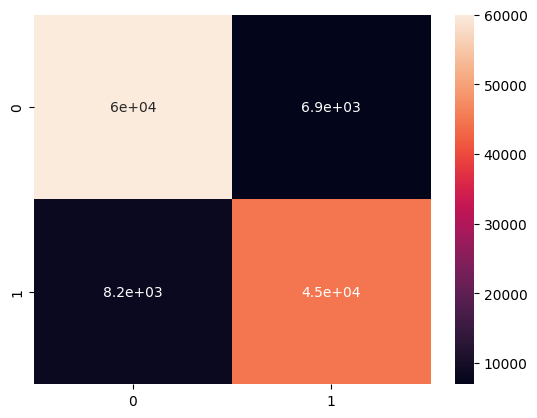

In [91]:
confussion= confusion_matrix(y_val, y_val_pred) #помимо accuracy, мы используем confussion matrix

sns.heatmap(confussion, annot=True)
plt.show()

In [92]:
importances = des_tree__pipeline.feature_importances_
print(importances)

[3.72273231e-02 2.87770877e-02 3.22007752e-01 5.62219518e-03
 1.06767068e-02 1.15149917e-01 1.76930431e-01 8.36001922e-03
 2.39603045e-01 4.10243496e-02 6.65465284e-04 1.20667282e-04
 1.38350409e-02]


In [93]:
feature_names = list(X_train.columns) #интерпритируем данные
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


                    feature  importance
2                     chest    0.322008
8                   rev_def    0.239603
6   number_of_major_vessels    0.176930
5                   oldpeak    0.115150
9                   slope=2    0.041024
0                       age    0.037227
1                       sex    0.028777
12          rest_elcardio=2    0.013835
4         serum_cholestoral    0.010677
7                   fix_def    0.008360
3    resting_blood_pressure    0.005622
10                  slope=3    0.000665
11          rest_elcardio=1    0.000121


Случайный лес

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
y_test_pred = model.predict(X_val)

In [96]:
(y_test_pred == y_val.values).mean()  # accuracy

0.8724166666666666

In [97]:
#Зададим сетку гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy']
}

In [98]:
from sklearn.model_selection import RandomizedSearchCV #импортируем RandomizedSearch для подбора гиперпараметров

In [99]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_val, y_val)

c:\phython3.9\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\phython3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\phython3.9\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\phython3.9\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\phython3.9\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [100]:
random_search.best_score_


0.8774000000000001

In [101]:
#Через случайный лес получились схожие результаты с деревом решений резцльтаты

PyTorch

In [102]:
!pip install torch torchvision torchaudio


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
X_train.shape

torch.Size([480000, 13])

In [133]:
X_train

tensor([[39.0000,  1.0000,  3.0000,  ...,  0.0000,  0.0000,  1.0000],
        [45.0000,  0.0000,  1.0600,  ...,  0.0000,  0.0000,  0.0000],
        [56.0000,  0.0000,  3.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [61.0000,  1.0000,  4.0000,  ...,  0.0000,  0.0000,  0.0000],
        [57.0000,  1.0000,  4.0000,  ...,  0.0000,  0.0000,  1.0000],
        [59.0000,  0.0000,  4.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [140]:
#Создание наборов данных PyTorch
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.long)

max_length = max(len(x) for x in X_train) # Определение максимальной длины

def pad_sequences(sequences):
  padded_sequences = []
  for seq in sequences:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), 'constant')
    padded_sequences.append(padded_seq)
  return np.array(padded_sequences)

X_train_padded = pad_sequences(X_train)
X_val_padded = pad_sequences(X_val)

X_train = torch.tensor(X_train_padded, dtype=torch.float32)
X_val = torch.tensor(X_val_padded, dtype=torch.float32)


In [131]:

#Определение функции потерь и оптимизатора

criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
#Обучение модели

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float()) # squeeze() для удаления лишнего измерения
        loss.backward()
        optimizer.step()

    # Валидация
    model.eval()
    with torch.no_grad():
        test_preds = model(X_val)
        test_loss = criterion(test_preds.squeeze(), y_val.float())
        test_preds_class = (test_preds > 0.5).float() # Преобразование вероятностей в классы
        accuracy = accuracy_score(y_val.numpy(), test_preds_class.numpy()) # Преобразование в numpy для sklearn
        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch [1/30], Test Loss: 0.3712, Accuracy: 0.8372
Epoch [2/30], Test Loss: 0.3345, Accuracy: 0.8551
Epoch [3/30], Test Loss: 0.3208, Accuracy: 0.8627
Epoch [4/30], Test Loss: 0.3148, Accuracy: 0.8645
Epoch [5/30], Test Loss: 0.3043, Accuracy: 0.8700
Epoch [6/30], Test Loss: 0.3082, Accuracy: 0.8671
Epoch [7/30], Test Loss: 0.2995, Accuracy: 0.8717
Epoch [8/30], Test Loss: 0.2979, Accuracy: 0.8729
Epoch [9/30], Test Loss: 0.2975, Accuracy: 0.8728
Epoch [10/30], Test Loss: 0.2967, Accuracy: 0.8732
Epoch [11/30], Test Loss: 0.2986, Accuracy: 0.8724
Epoch [12/30], Test Loss: 0.3197, Accuracy: 0.8619
Epoch [13/30], Test Loss: 0.2973, Accuracy: 0.8729
Epoch [14/30], Test Loss: 0.2955, Accuracy: 0.8739
Epoch [15/30], Test Loss: 0.3028, Accuracy: 0.8707
Epoch [16/30], Test Loss: 0.2982, Accuracy: 0.8719
Epoch [17/30], Test Loss: 0.3008, Accuracy: 0.8712
Epoch [18/30], Test Loss: 0.2976, Accuracy: 0.8732
Epoch [19/30], Test Loss: 0.3173, Accuracy: 0.8625
Epoch [20/30], Test Loss: 0.2991, Accura

In [112]:
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

In [141]:
# 5. Предсказание и оценка

model.eval()
with torch.no_grad():
    predictions = model(X_val)
    predicted_classes = (predictions > 0.5).float() # 0 если <0.5, 1 если >= 0.5


In [106]:
#Результаты метрики Accuracy 4 моделей машинного обучения:

# 1 LogisticRegression 86.5
# 2 DecisionTree 87.5
# 3 RandomForest 88
# 4 PyTorch 87.5

#Видим что резульаьы примерно одинаковые

In [135]:
#Предсказание y_test сделаем на модели PyTorch

#Сохраним модель
torch.save(model.state_dict(), 'PyTorch_model')